In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import re            #for processing regular expressions
import datetime      #for datetime operations
import calendar      #for calendar for datetime operations
import time          #to get the system time
import scipy   
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_pickle('dataset_mod.pickle')

In [3]:
dataset.head()

,ID,Start Time,End Time,Start Latitude,Start Longitude,End Latitude,End Longitude,Duration
0,150814781,2016-07-01 06:00:42,2016-07-01 06:02:41,12.790002,77.706490,12.790002,77.706490,0.0
1,150814781,2016-07-01 06:03:01,2016-07-01 06:04:30,12.790002,77.706490,12.790002,77.706490,0.0
2,150814781,2016-07-01 06:05:41,2016-07-01 06:06:11,12.798047,77.706184,12.801986,77.704803,30.0
3,150814781,2016-07-01 06:07:01,2016-07-01 06:10:46,12.801986,77.704803,12.794087,77.721321,225.0
4,150814781,2016-07-01 06:08:20,2016-07-01 06:11:30,12.801986,77.704803,12.792457,77.727730,190.0


In [4]:
train, test = train_test_split(dataset, test_size=0.2, random_state=0)

/home/jagatdeep/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


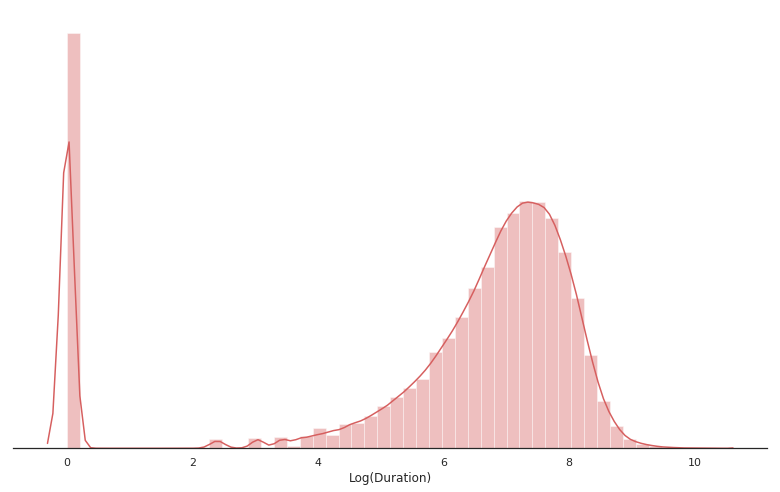

In [5]:
#Lets visualize the trip duration given using log-scale distplot in sns
%matplotlib inline
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 1, figsize=(11, 7), sharex=True)
sns.despine(left=True)
sns.distplot(np.log(dataset['Duration'].values+1), axlabel = 'Log(Duration)', label = 'log(Duration)', bins = 50, color="r")
plt.setp(axes, yticks=[])
plt.tight_layout()
#end = time.time()
plt.show()

/home/jagatdeep/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Time taken by above cell is 0.7670345306396484.


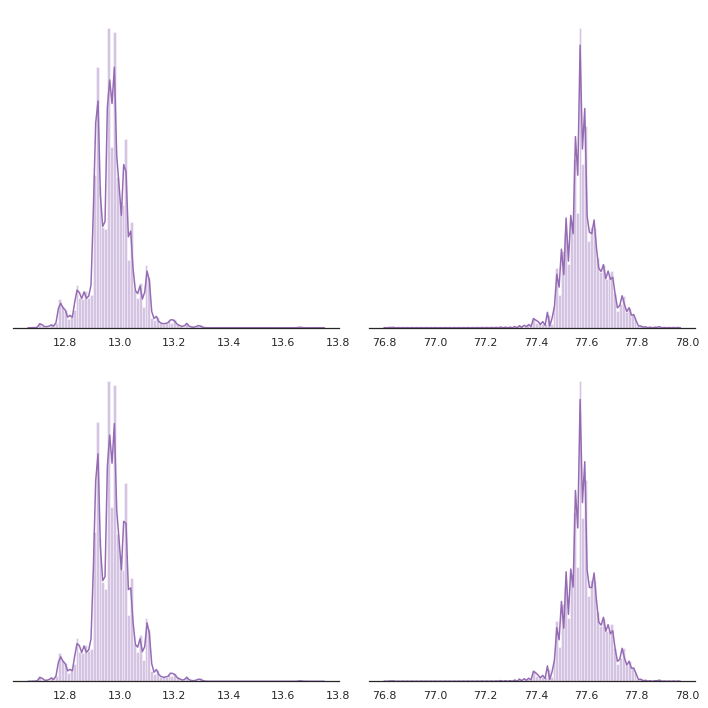

In [6]:
#Visualize Latitude and Longitude
start = time.time()
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(dataset['Start Latitude'].values, label = 'pickup_latitude',color="m",bins = 100, ax=axes[0,0])
sns.distplot(dataset['Start Longitude'].values, label = 'pickup_longitude',color="m",bins =100, ax=axes[0,1])
sns.distplot(dataset['End Latitude'].values, label = 'dropoff_latitude',color="m",bins =100, ax=axes[1, 0])
sns.distplot(dataset['End Longitude'].values, label = 'dropoff_longitude',color="m",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()
end = time.time()
print("Time taken by above cell is {}.".format((end-start)))
plt.show()

In [7]:
dataset.columns = ['ID','Start_Time','End_Time','Start_Latitude','Start_Longitude','End_Latitude','End_Longitude','Duration']

In [8]:
#Lets remove outliers
start = time.time()
df = dataset.loc[(np.log(dataset.Duration) >= 4)]
df = df.loc[(df.Start_Latitude<13.3)]
df = df.loc[(df.End_Latitude < 13.3)]
df = df.loc[(df.Start_Longitude > 77.3)]
df = df.loc[(df.End_Longitude > 77.3)]
dataset_new = df.copy()

/home/jagatdeep/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


/home/jagatdeep/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


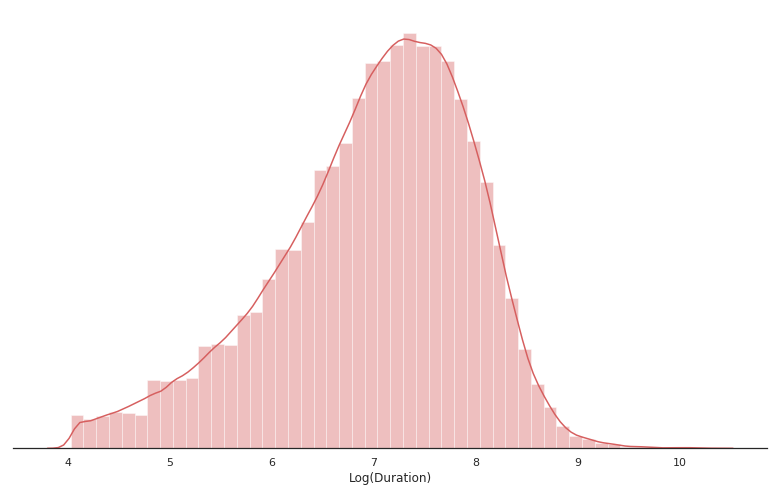

In [9]:
#Lets visualize again the trip duration given using log-scale distplot in sns
%matplotlib inline
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 1, figsize=(11, 7), sharex=True)
sns.despine(left=True)
sns.distplot(np.log(dataset_new['Duration'].values+1), axlabel = 'Log(Duration)', label = 'log(Duration)', bins = 50, color="r")
plt.setp(axes, yticks=[])
plt.tight_layout()
#end = time.time()
plt.show()

/home/jagatdeep/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Time taken by above cell is 0.734811544418335.


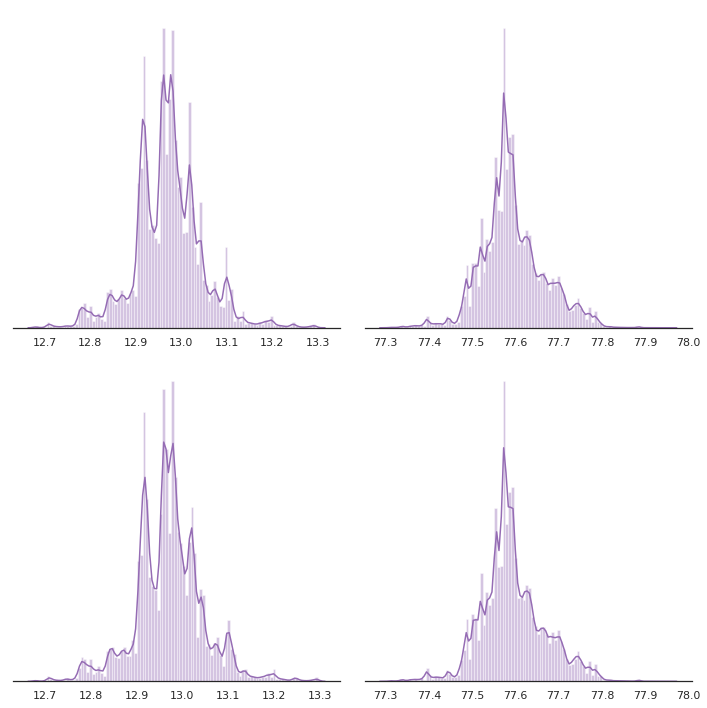

In [10]:
#Visualize Latitude and Longitude
start = time.time()
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(dataset_new['Start_Latitude'].values, label = 'pickup_latitude',color="m",bins = 100, ax=axes[0,0])
sns.distplot(dataset_new['Start_Longitude'].values, label = 'pickup_longitude',color="m",bins =100, ax=axes[0,1])
sns.distplot(dataset_new['End_Latitude'].values, label = 'dropoff_latitude',color="m",bins =100, ax=axes[1, 0])
sns.distplot(dataset_new['End_Longitude'].values, label = 'dropoff_longitude',color="m",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()
end = time.time()
print("Time taken by above cell is {}.".format((end-start)))
plt.show()

Time taken by above cell is 4.869018793106079.


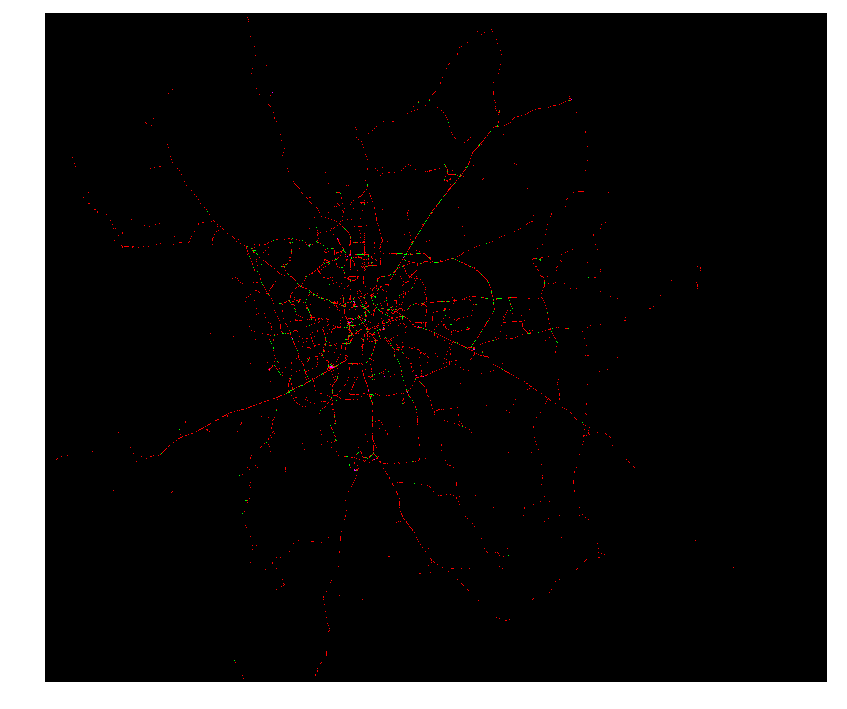

In [11]:
start = time.time()
rgb = np.zeros((3000, 3500, 3), dtype=np.uint8)
rgb[..., 0] = 0
rgb[..., 1] = 0
rgb[..., 2] = 0
dataset_new['pick_lat_new'] = list(map(int, (dataset_new['Start_Latitude'] - (12.7))*5000))
dataset_new['drop_lat_new'] = list(map(int, (dataset_new['End_Latitude'] - (12.7))*5000))
dataset_new['pick_lon_new'] = list(map(int, (dataset_new['Start_Longitude'] - (77.3))*5000))
dataset_new['drop_lon_new'] = list(map(int, (dataset_new['End_Longitude'] - (77.3))*5000))

summary_plot = pd.DataFrame(dataset_new.groupby(['pick_lat_new', 'pick_lon_new'])['ID'].count())

summary_plot.reset_index(inplace = True)
#print(summary_plot.head(120))
lat_list = summary_plot['pick_lat_new'].unique()
#print(lat_list)
for i in lat_list:
    lon_list = summary_plot.loc[summary_plot['pick_lat_new']==i]['pick_lon_new'].tolist()
    unit = summary_plot.loc[summary_plot['pick_lat_new']==i]['ID'].tolist()
    for j in lon_list:
        a = unit[lon_list.index(j)]
        if (a//50) >0:
            rgb[i][j][0] = 255
            rgb[i,j, 1] = 0
            rgb[i,j, 2] = 255
        elif (a//10)>0:
            rgb[i,j, 0] = 0
            rgb[i,j, 1] = 255
            rgb[i,j, 2] = 0
        else:
            rgb[i,j, 0] = 255
            rgb[i,j, 1] = 0
            rgb[i,j, 2] = 0
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(14,20))
end = time.time()
print("Time taken by above cell is {}.".format((end-start)))
ax.imshow(rgb, cmap = 'hot')
ax.set_axis_off() 

In [12]:
dataset_new = df.copy()
dataset_new.head()

,ID,Start_Time,End_Time,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Duration
3,150814781,2016-07-01 06:07:01,2016-07-01 06:10:46,12.801986,77.704803,12.794087,77.721321,225.0
4,150814781,2016-07-01 06:08:20,2016-07-01 06:11:30,12.801986,77.704803,12.792457,77.727730,190.0
5,150814781,2016-07-01 06:10:49,2016-07-01 06:12:29,12.793974,77.721748,12.790604,77.732292,100.0
6,150814781,2016-07-01 06:12:59,2016-07-01 06:17:27,12.788506,77.736084,12.781456,77.763435,268.0
7,150814781,2016-07-01 06:15:58,2016-07-01 06:18:17,12.785234,77.751587,12.779743,77.767654,139.0


In [13]:
#Let's define few functions to unfold features in the given data
start = time.time()
def haversine_(lat1, lng1, lat2, lng2):
    """function to calculate haversine distance between two co-ordinates"""
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return(h)

def manhattan_distance_pd(lat1, lng1, lat2, lng2):
    """function to calculate manhatten distance between pick_drop"""
    a = haversine_(lat1, lng1, lat1, lng2)
    b = haversine_(lat1, lng1, lat2, lng1)
    return a + b

import math
def bearing_array(lat1, lng1, lat2, lng2):
    """ function was taken from beluga's notebook as this function works on array
    while my function used to work on individual elements and was noticably slow"""
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

end = time.time()
print("Time taken by above cell is {}.".format((end-start)))

Time taken by above cell is 0.000331878662109375.


In [14]:
#Feature extratction 
start = time.time()
train_data = dataset_new.copy()
#train_data['pickup_datetime'] = pd.to_datetime(train_data.pickup_datetime)
train_data.loc[:, 'pick_month'] = train_data['Start_Time'].dt.month
train_data.loc[:, 'hour'] = train_data['Start_Time'].dt.hour
train_data.loc[:, 'week_of_year'] = train_data['Start_Time'].dt.weekofyear
train_data.loc[:, 'day_of_year'] = train_data['Start_Time'].dt.dayofyear
train_data.loc[:, 'day_of_week'] = train_data['Start_Time'].dt.dayofweek
train_data.loc[:,'hvsine_pick_drop'] = haversine_(train_data['Start_Latitude'].values, train_data['Start_Longitude'].values, train_data['End_Latitude'].values, train_data['End_Longitude'].values)
train_data.loc[:,'manhtn_pick_drop'] = manhattan_distance_pd(train_data['Start_Latitude'].values, train_data['Start_Longitude'].values, train_data['End_Latitude'].values, train_data['End_Longitude'].values)
train_data.loc[:,'bearing'] = bearing_array(train_data['Start_Latitude'].values, train_data['Start_Longitude'].values, train_data['End_Latitude'].values, train_data['End_Longitude'].values)

end = time.time()
print("Time taken by above cell is {}.".format(end-start))

Time taken by above cell is 0.44873571395874023.


In [15]:
train_data.head(5)

,ID,Start_Time,End_Time,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Duration,pick_month,hour,week_of_year,day_of_year,day_of_week,hvsine_pick_drop,manhtn_pick_drop,bearing
3,150814781,2016-07-01 06:07:01,2016-07-01 06:10:46,12.801986,77.704803,12.794087,77.721321,225.0,7,6,26,183,4,1.994858,2.669389,116.120964
4,150814781,2016-07-01 06:08:20,2016-07-01 06:11:30,12.801986,77.704803,12.792457,77.727730,190.0,7,6,26,183,4,2.702424,3.545570,113.081674
5,150814781,2016-07-01 06:10:49,2016-07-01 06:12:29,12.793974,77.721748,12.790604,77.732292,100.0,7,6,26,183,4,1.203180,1.518058,108.145288
6,150814781,2016-07-01 06:12:59,2016-07-01 06:17:27,12.788506,77.736084,12.781456,77.763435,268.0,7,6,26,183,4,3.067743,3.749774,104.802428
7,150814781,2016-07-01 06:15:58,2016-07-01 06:18:17,12.785234,77.751587,12.779743,77.767654,139.0,7,6,26,183,4,1.846180,2.352845,109.310795


29743.0
Time taken by above cell is 0.1542341709136963.


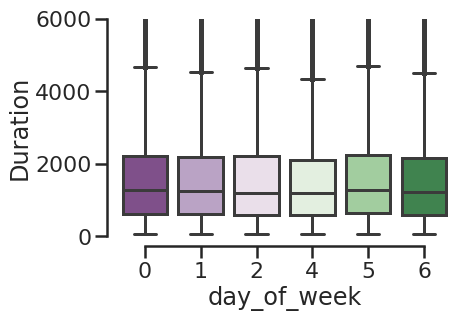

In [16]:
#Box-Plots
start = time.time()
sns.set(style="ticks")
sns.set_context("poster")
sns.boxplot(x="day_of_week", y="Duration", data=train_data, palette="PRGn")
plt.ylim(0, 6000)
sns.despine(offset=10, trim=True)
print(train_data.Duration.max())
end = time.time()
print("Time taken by above cell is {}.".format(end-start))

/home/jagatdeep/.local/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/jagatdeep/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


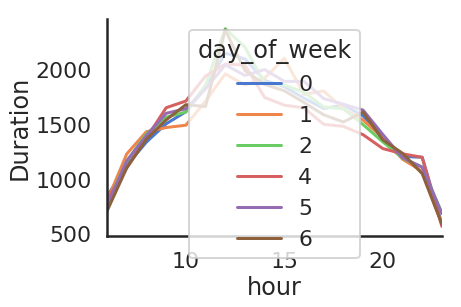

In [17]:
#line-plots
#Simple lineplots can explain how the trip duration is changing with time for different days of week
#very easy to interpret
summary_hour_duration = pd.DataFrame(train_data.groupby(['day_of_week','hour'])['Duration'].mean())
summary_hour_duration.reset_index(inplace = True)
summary_hour_duration['unit']=1
sns.set(style="white", palette="muted", color_codes=False)
sns.set_context("poster")
sns.tsplot(data=summary_hour_duration, time="hour", unit = "unit", condition="day_of_week", value="Duration")
sns.despine(bottom = False)

In [18]:
train_data.head()

,ID,Start_Time,End_Time,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Duration,pick_month,hour,week_of_year,day_of_year,day_of_week,hvsine_pick_drop,manhtn_pick_drop,bearing
3,150814781,2016-07-01 06:07:01,2016-07-01 06:10:46,12.801986,77.704803,12.794087,77.721321,225.0,7,6,26,183,4,1.994858,2.669389,116.120964
4,150814781,2016-07-01 06:08:20,2016-07-01 06:11:30,12.801986,77.704803,12.792457,77.727730,190.0,7,6,26,183,4,2.702424,3.545570,113.081674
5,150814781,2016-07-01 06:10:49,2016-07-01 06:12:29,12.793974,77.721748,12.790604,77.732292,100.0,7,6,26,183,4,1.203180,1.518058,108.145288
6,150814781,2016-07-01 06:12:59,2016-07-01 06:17:27,12.788506,77.736084,12.781456,77.763435,268.0,7,6,26,183,4,3.067743,3.749774,104.802428
7,150814781,2016-07-01 06:15:58,2016-07-01 06:18:17,12.785234,77.751587,12.779743,77.767654,139.0,7,6,26,183,4,1.846180,2.352845,109.310795


In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415016 entries, 3 to 487464
Data columns (total 16 columns):
ID                  415016 non-null object
Start_Time          415016 non-null datetime64[ns]
End_Time            415016 non-null datetime64[ns]
Start_Latitude      415016 non-null float64
Start_Longitude     415016 non-null float64
End_Latitude        415016 non-null float64
End_Longitude       415016 non-null float64
Duration            415016 non-null float64
pick_month          415016 non-null int64
hour                415016 non-null int64
week_of_year        415016 non-null int64
day_of_year         415016 non-null int64
day_of_week         415016 non-null int64
hvsine_pick_drop    415016 non-null float64
manhtn_pick_drop    415016 non-null float64
bearing             415016 non-null float64
dtypes: datetime64[ns](2), float64(8), int64(5), object(1)
memory usage: 73.8+ MB


In [25]:
X_linear = train_data[['hvsine_pick_drop', 'manhtn_pick_drop']]
y_linear = train_data[['Duration']]

In [26]:
from sklearn import linear_model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

linear_model = linear_model.LinearRegression()
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(linear_model, X_linear, y_linear, cv=cv)

array([0.15131487, 0.15581102, 0.15158076, 0.15072431, 0.15066915])

In [27]:
from sklearn import linear_model
lasso_model = linear_model.Ridge (alpha = .5)
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(lasso_model, X_linear, y_linear, cv=cv)

array([0.15131487, 0.15581103, 0.15158076, 0.15072431, 0.15066916])

In [28]:
ridge_model = linear_model.Ridge (alpha = .01)
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(ridge_model,X_linear, y_linear, cv=cv)

array([0.15131487, 0.15581102, 0.15158076, 0.15072431, 0.15066915])

In [ ]:
tree_feature = ['trip_duration', 'vendor_id', 
                'passenger_count','pickup_pca0', 
                'pickup_pca1','dropoff_pca0',''
                'dropoff_pca1','pickup_hour','pickup_month',
                'dropoff_hour','dropoff_month','direction',
                'distance_haversine','pickup_weekday',
                'distance_manhattan']

In [20]:
train_data.to_pickle('train_data.pickle')